# Project description

In this project we work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

In front of us is data going back to 2016. 

Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether we're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016).

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. 
Data for 2016 may be incomplete.

The goal of this project is to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.  

The tasks of the analysis are to preprocess the data, visualize it from different perspectives, and determine:

- What period of time is significant for the analysis
- How do sales variate on different platforms and regions
- What is an average age of a platform
- Which genres of games are more popular than others
- Do ratings and scores affect sales


In [1]:
# Importing all libraries
import pandas as pd
import datetime 
import sidetable
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import re
import math
import squarify 
from functools import reduce
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

In [2]:
# An installation path for the sidetable library and squarify
#! pip install sidetable
#! pip install squarify
#! pip install -U seaborn


In [3]:
# Load the data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\\Users\\R\\OneDrive\\Рабочий стол\\Lucy\\games.csv')

In [4]:
# See general information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


—`Name` the name of the game

—`Platform` the name of the platform the game was released on

—`Year_of_Release` year of the game release

—`Genre` 

—`NA_sales` (North American sales in USD million)

—`EU_sales` (sales in Europe in USD million)

—`JP_sales` (sales in Japan in USD million)

—`Other_sales` (sales in other countries in USD million)

—`Critic_Score` (maximum of 100)

—`User_Score` (maximum of 10)

—`Rating` ESRB ratings provide information about what’s in a game or app so parents and consumers can make informed choices about which games are right for their family.

Lets' get aquainted with our dataset and see how the table looks:

In [5]:
# What do the 5 upper rows look like?
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# What do the 5 last rows look like?
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
# # What do 5 randomly selected rows look like?
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10164,ESPN NHL Hockey,XB,2003.0,Sports,0.08,0.02,0.0,0.00,88.0,8.4,E
7500,Wedding Dash,DS,2009.0,Action,0.19,0.00,0.0,0.01,NaN,tbd,E
8311,MotoGP 10/11,PS3,2011.0,Racing,0.04,0.10,0.0,0.03,68.0,6.1,E
7504,Capcom Fighting Evolution,PS2,2004.0,Fighting,0.10,0.08,0.0,0.03,57.0,4.8,T
15227,Dino Dini's Kick Off Revival,PS4,2016.0,Sports,0.00,0.02,0.0,0.00,31.0,4.5,NaN


In [8]:
# See basic statistics
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


# Intermediate conclusion

The `info()` method showed us that in our dataset there are 16715 observations in 11 columns, we see that values are missing in the Name, Genre, Year of Release, Critic Score, User Score and Rating columns. Name and Genre have the same amount of missing values, so it may be missing symmetrical, if so we will drop them. Some of the information in the Year of Release may be restorable as there are years inside of some of the names of the games, so we will restore as much as possible, but for Critic Score, User Score and Rating it would not be possible. Since our analysis demands us to take views at the data from a lot of different perspectives, the strategy of treating those missing values will be to restore as much as possible in the year of release column, replace missing cvalues with "unknown" in the rating column, and for the rest just ignore or drop them if there aren't more than 10% of all data. There are unsuitable data types in the year of release that should be a datetime format instead of float, but actually, because we need to perform a lot of operations with this column for better representation we will change the data type to integers or extract it as a year from a datetime format, next is user score that is stored as an object, because there are user scores as 'tbd' - to be defined - they probably occurred at very old games or at very new ones that just weren't criticized and finally we have the critic score: there is no reason for it to be a real number, we will change it to integers.

The `describe()` table for numerical observations gave us all the information about minimum and  maximum values of each column, their average value, standard deviation and the amount of observations. But have a look at the categorical table - user score should have occured in the numericals - it happened because the column contains such value as 'tbd' - to be determined. We will need to fix this. The next steps for us to take are - treating missing values and looking for errors or duplicates.

# 1 Preprocessing

In order to have an easier access to the columns lets replace the column names and make them lowercase.

In [10]:
data.columns = [x.lower() for x in data.columns]

## Treat missing values

In [11]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Now we know how many values are missing in each column. But it would be much better to know what percentage they take in the dataframe.

In [12]:
# See installation path in hadder, if didn't work - rely on data.isnull().sum()
data.stb.missing(clip_0=True, style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%


The amount of missing genres and names is the same, lets' check them out:

In [13]:
data[data['name'].isnull() | data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Those values indeed are missing symmetrically and we cannot restore the name, so we can ommite them.

In [14]:
data.drop(labels=[659, 14244], inplace=True)

In [15]:
data.shape

(16713, 11)

To fill the missing values in the `year_of_release` column we can search for a pattern in a string using regular expressions. To find all those matches we need a function.

In [16]:
def get_year(row):
    regex= "\d{4}"  # a pattern of 4 digits
    match = re.findall(regex, row)
    for i in match:
        if 1970 < int(i) < 2017: # filtering out only relevant patterns that are years
            return float(i)
        else:
            return 0.0

In [17]:
# Check to see if the function worked
print(get_year('Bust-A-Move 3000'))
get_year('Yu-Gi-Oh! World Championship 2007')

0.0


2007.0

In [18]:
# Apply the function and return the result to a new column
data['year'] = data['name'].apply(lambda x: get_year(str(x)))
data.year

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
16710       NaN
16711    2007.0
16712       NaN
16713       NaN
16714    2016.0
Name: year, Length: 16713, dtype: float64

For the next step we need to check if the value is missing in the year of release column, then replace it with the corresponding value from the same row from the newly added year column. This is a task for another function.

In [19]:
def filter_nans(row):
    if math.isnan(row['year_of_release']):
        return row['year']
    else:
        return row['year_of_release']

In [20]:
# Apply the function
data['year_of_release'] = data.apply(filter_nans, axis=1)

In [21]:
data['year_of_release'].isnull().sum()

252

Previously there were 269 missing values here. We managed to restore 17 rows with this function.

The year column has fulfiiled its' mission and for now can be deleted.

In [22]:
del data['year']

Lets' ommite the rest of the missing values in the year of release column.

In [23]:
data = data[data['year_of_release'].notna()]

Filling in ratings missing values with "unknown".

In [24]:
data['rating'].fillna('unknown', inplace=True)

In [25]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating                0
dtype: int64

We filled and droped what was safe to drop in the name, genre and year of release columns, but as for critic score, user score and rating there is no way for us to restore or calculate those values. They could be missing because those games were'nt yet evaluated (criticized and rated).

## Checking for zeros

In [26]:
def zero_func(data):
    for row in data:
        print(row, len(data[data[row] == 0]))

In [27]:
zero_func(data)

name 0
platform 0
year_of_release 0
genre 0
na_sales 4452
eu_sales 5769
jp_sales 10313
other_sales 6496
critic_score 0
user_score 0
rating 0


Zeros appearing in sales columns are apropriate, everythig is correct here.

In [28]:
# Check duplicates
data.duplicated().sum()

0

## Convert the data to the required types.

Let's start with 'tbd' string - we don't need it to be in our way when we make calculations, it will be much easier to ommite them if they are Nan's.

In [29]:
data.loc[data['user_score'] =='tbd', 'user_score'] = np.nan
data['user_score'].isnull().sum()

8988

Previously there were 8578 missing values here.

Moving on to fix the datatype in this column as well.

In [30]:
data['user_score'].dtype

dtype('O')

In [31]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [32]:
# Change the date to the correct format
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [33]:
data['year_of_release']

0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16710   2016-01-01
16711   2006-01-01
16712   2016-01-01
16713   2003-01-01
16714   2016-01-01
Name: year_of_release, Length: 16461, dtype: datetime64[ns]

Now that we changed the data type in the year of release column it will not look good on the graphs in the presented format. We can instead extract only the year to a separate column.

In [34]:
data['year'] = data['year_of_release'].dt.year

We won't be needing the year of release columns, so let's delete it.

In [35]:
del data['year_of_release']

# The big picture thus far

In our preprocessed dataset there are now **16461 and 12 columns** - we managed to fill **17 rows of missing years**, but had to drop the rest of them, because our analysis is about finding a significant period of time and we don't want something to be wrong with this column. Same is true for the `rating`, `user score` and `critic score` - we can assume that this info may be missing for a couple of reasons: we know that the data for the 2016 year is not full so thats first, or the second probability is that some of those games were not evaluated by users, critics or ESRB because either they were too old or too new. However, the share of the missing values in those columns is so large that we can't drop any of those without losing a large amount of rows with other good data that we need for the analysis to be successful. So the policy from this step is to ignore misiing values wherever it will be necessary.

In the next steps of our analysis our task will be to answer the next questions:

• How many games were released in different years? Is the data for every period significant?

• How sales varied from platform to platform? We will choose the platforms with the greatest total sales and build a distribution based on the data for each year

• How long does it generally take for new platforms to appear and old ones to fade?

• Which platforms are leading in sales? Which ones are growing or shrinking? 

• What is the distribution of the total sales of all games, broken down by platform? Are the differences in sales significant? What about average sales on various platforms? 

• How user and professional reviews affect sales for one (for our choice) popular platform?

• What can we say about the most profitable genres?

Lets' proceed to visualization.

# 2 Calculate the total sales

Before we continue to our analysis we need to calculate the total of sales from all regions to one separate column.

In [36]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,1985,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,1996,31.38


In [37]:
data.shape

(16461, 12)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16461 non-null  object 
 1   platform      16461 non-null  object 
 2   genre         16461 non-null  object 
 3   na_sales      16461 non-null  float64
 4   eu_sales      16461 non-null  float64
 5   jp_sales      16461 non-null  float64
 6   other_sales   16461 non-null  float64
 7   critic_score  7995 non-null   float64
 8   user_score    7473 non-null   float64
 9   rating        16461 non-null  object 
 10  year          16461 non-null  int64  
 11  total_sales   16461 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# 3 Analyze the data

**Here is the first question we need to answer: look at how many games were released in different years. Is the data for every period significant?**

In [39]:
# Subset the data by year and name
games_count = data[['year','name']].groupby(['year']).count().sort_values(by='year').reset_index()
games_count

,year,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


An ordered histogram would effectively show us an order in which items are ranked, but there is a good looking alternative to it - the lollypop graph.

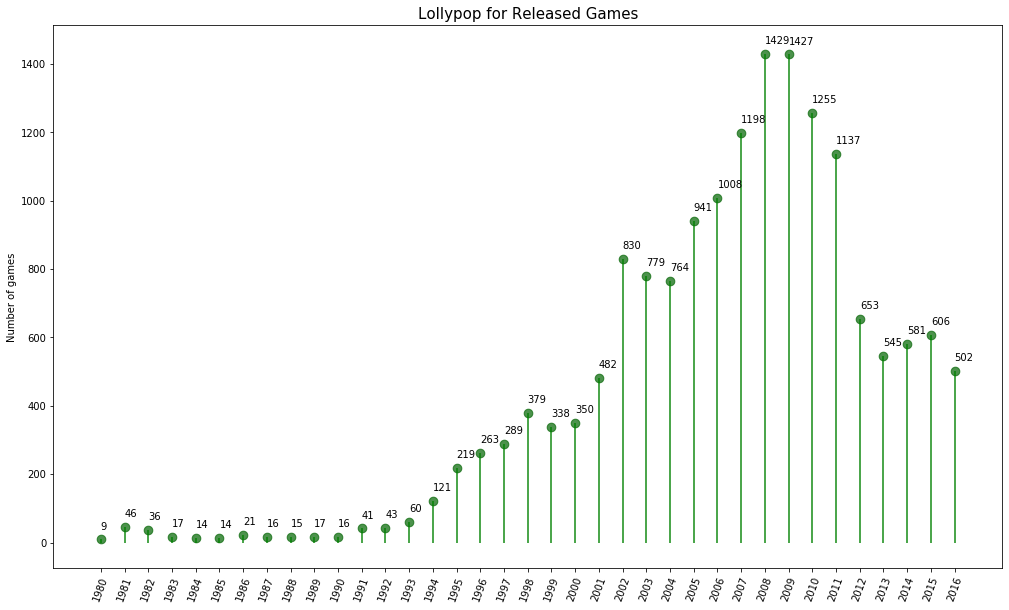

In [40]:
# Figure of the plot
fig,ax=plt.subplots(figsize=(17,10))
# Define the plot
ax.vlines(x=games_count['year'], ymin=0, ymax=games_count['name'], color='green', alpha=0.7, linewidth=2)
ax.scatter(x=games_count['year'], y=games_count['name'], s=75, color='darkgreen',alpha=0.7)
# Add titles and labels
ax.set_title("Lollypop for Released Games", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(games_count['year'])
ax.set_xticklabels(games_count['year'], rotation=70)
# Iterate over the rows in our subset
for row in games_count.itertuples():
    ax.text(row.year, row.name + 30, s=row.name)

So this graph shows us a very interesting thing: note how there seem to be three periods that are devided by a certein gap between them, for example - between **1993 and 1994**, than between **2001 and 2002**. And the difference in the level of the sales is big in comparing the earlier years to our time, so apperantly the significant data is the latest, from the year **2000** a little bit before the ammount of games started rising. 

Now we need to look at **how sales varied from platform to platform.** At this step we also have to choose the platforms with the greatest total sales and build a distribution based on data for each year. To do so we can use z-standartization as one of the measures of variation. The value of the z-score will tell us how many standard deviations we are away from the mean. If a z-score is equal to 0, it is on the mean. A positive z-score indicates the raw score is higher than the mean average. For example, if a z-score is equal to +1, it is 1 standard deviation above the mean. A negative z-score reveals the raw score is below the mean average. For example, if a z-score is equal to -2, it is 2 standard deviations below the mean. So first we need to take all of our platfroms with their total sales, sort them and calculate the z-score for each one of them according to the formula:
$$ z =  \frac {x - \mu} {\sigma}$$  where x is every observation, $\mu$ is the mean and $\sigma$ is the standart deviation.

A good tool of visualization here will be a diverging bar plot. It can show us which platforms had a positive deviation, and which had negative z-score. 

In [41]:
# Subset the data by platforms and total sales
biggest_sales_platforms = data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
biggest_sales_platforms

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [42]:
# Calculate the z-score
biggest_sales_platforms['zscore_sales'] = (biggest_sales_platforms['total_sales'] - biggest_sales_platforms['total_sales'].mean()) / biggest_sales_platforms['total_sales'].std()
biggest_sales_platforms

,platform,total_sales,zscore_sales
0,PCFX,0.03,-0.825071
1,GG,0.04,-0.825042
2,3DO,0.10,-0.824869
3,TG16,0.16,-0.824695
4,WS,1.42,-0.821045
5,NG,1.44,-0.820987
6,SCD,1.86,-0.819770
7,DC,15.95,-0.778956
8,GEN,28.35,-0.743037
9,SAT,33.59,-0.727858


In [43]:
# Give z-score color definitions for the sake of future visualisaton, red for negative and green for positive
biggest_sales_platforms['color'] = ['red' if x<0 else 'green' for x in biggest_sales_platforms['zscore_sales']]
biggest_sales_platforms

,platform,total_sales,zscore_sales,color
0,PCFX,0.03,-0.825071,red
1,GG,0.04,-0.825042,red
2,3DO,0.10,-0.824869,red
3,TG16,0.16,-0.824695,red
4,WS,1.42,-0.821045,red
5,NG,1.44,-0.820987,red
6,SCD,1.86,-0.819770,red
7,DC,15.95,-0.778956,red
8,GEN,28.35,-0.743037,red
9,SAT,33.59,-0.727858,red


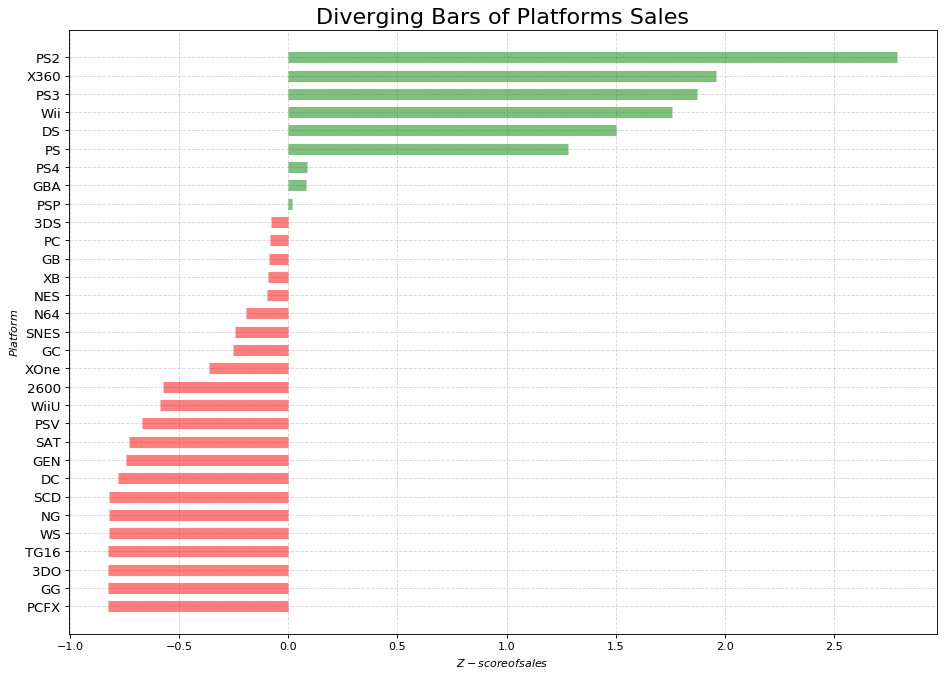

In [44]:
# Draw a horizontal bar-plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=biggest_sales_platforms.platform, xmax=biggest_sales_platforms.zscore_sales, xmin=0, color=biggest_sales_platforms.color, alpha=0.5, linewidth=10)

# Titles
plt.gca().set(ylabel='$Platform$', xlabel='$Z-score of sales$')
plt.yticks(biggest_sales_platforms.index, biggest_sales_platforms.platform, fontsize=12)
plt.title('Diverging Bars of Platforms Sales', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)


`PSP`, `PS4`, `GBA`, `PS`, `DS`, `Wii`, `PS3`, `X360`, `PS2` - those are the platforms, which sales are distributed above the mean of the total sales.

Next step is to **find platforms that used to be popular but now have zero sales.** Lets' answer the question - how long does it generally take for new platforms to appear and old ones to fade? This is a job for a lineplot graph - we need to filter the data starting from the year 2000, keeping in mind that this was the year we priviously defined as the beginnig of a significant period and group this subset by platform and year.

In [45]:
# Subset our data
pop_platforms = data.groupby(['platform', 'year'], as_index=False)['total_sales'].sum().sort_values(by='year')
pop_platforms = pop_platforms.query('year > 2000')

In [46]:
# Creating a bright color palette
colors = ['#54478C', '#2C699A', '#048BA8', '#0DB39E', '#16DB93',
          '#83E377', '#B9E769', '#EFEA5A', '#F1C453', '#F29E4C', 
         '#ff595e', '#ffca3a', '#8ac926', '#1982c4', '#6a4c93',
         "#55dde0","#33658a","#2f4858","#f6ae2d","#f26419"]

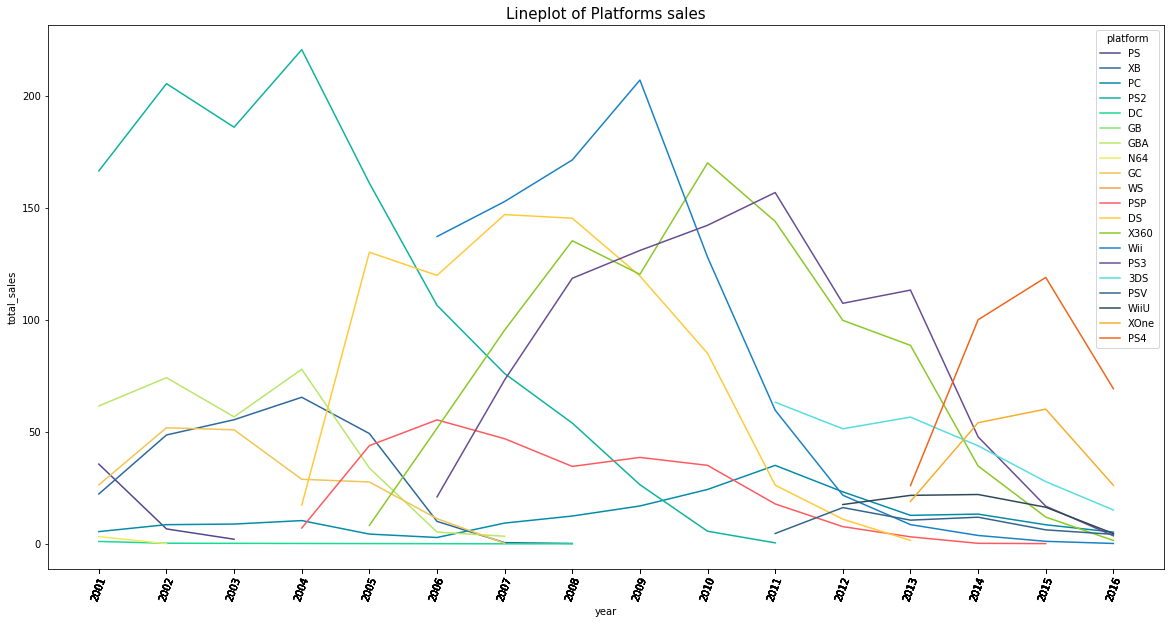

In [47]:
# Figure of the plot
plt.figure(figsize=(20, 10))
# Define the plot
ax = sns.lineplot(data=pop_platforms, x='year', y='total_sales', hue='platform', palette=colors)
# Set all necessary labels
ax.set_title("Lineplot of Platforms sales", fontdict={'size':15})
ax.set_xticks(pop_platforms['year'])
ax.set_xticklabels(pop_platforms['year'], rotation=70)
plt.show()

Remember our profitable platforms? `PSP`, `PS4`, `GBA`, `PS`, `DS`, `Wii`, `PS3`, `X360`, `PS2` - let's have a look at their lifetime:
* `PSP`: started in 2004, lasted till 2015 and had a stable curve of sales, 
* `PS4`: was released at 2013, had a peak of sales in 2015, and continues living in 2016. 
* `GBA`: occured before 2000 and lived till 2007, 
* `DS`: startes from 2004, had a high level of sales from 2005 till 2010, lived till 2013, 
* `Wii`: hits off very succesfully at 2006, has a peak in 2009 and decreases till 2016, but the data is not full and the platform still lives, so it can still make another peak before it fades, 
* `PS3`: started at 2006 rises it's sales till 2011, then has another small peak at 2013 and falls since then, 
* `X360`: sales start from 2005 and has peaks in 2007 and 2010, slowly falls till 2016, exists in and also can still make a peak of sales,
* `PS2`: started earlier than 2001 (actually 2000), reached the peaks in sales very fast, decreased in sales since 2004, lived to 2011. 

So we can actully see, that the platforms, defined as profitable almost all of them died some time before the 2016,- `X360`, `Wii` and `PS4` **stay in 2016.** 

Next, we need to make our further conclusions based on the latest data, but how many years back from 2016 we need to see? **Lets' try to find out the general lifetime of a platfrom, that will give us an estimation of the amount of such years.**

In [48]:
# Grouping platorms by the year, adding minimum and maximum year
age_pop_platforms = pop_platforms.groupby(['platform'])['year'].agg(['min', 'max']).reset_index()

In [49]:
# Calculate the age into a separate column
age_pop_platforms['age'] = age_pop_platforms['max'] - age_pop_platforms['min']

In [50]:
age_pop_platforms.sort_values(by='age', ascending=False)

,platform,min,max,age
7,PC,2001,2016,15
12,PSP,2004,2015,11
17,X360,2005,2016,11
10,PS3,2006,2016,10
15,Wii,2006,2016,10
9,PS2,2001,2011,10
2,DS,2004,2013,9
18,XB,2001,2008,7
1,DC,2001,2008,7
4,GBA,2001,2007,6


In [51]:
# Lets look at the sales they made through their lifetime
pop_platforms.groupby('platform', as_index=False)['total_sales'].sum().sort_values(by='total_sales', ascending=False)

,platform,total_sales
9,PS2,1208.11
17,X360,961.30
10,PS3,931.34
15,Wii,891.18
2,DS,802.77
11,PS4,314.14
4,GBA,312.81
12,PSP,290.34
0,3DS,257.81
18,XB,251.67


In [52]:
age_pop_platforms['age'].median()

6.0

So the typical lifetime of a platform lasts about **6 years.** During this time the sales peak is roughly in the middle of this period, once or twice. It is fair to say, that if we wanted to prognoze something for platforms for the year *2017* we would judge on platfroms that occured 3-4 years age. In our lineplot graph such platforms were `Xbox One` and `PS4`. If we substract 4 years of the year of prognosis (2017) we get 2013.

We now can disregard all the data, previous to the relevant year, *2013.* 

In [53]:
data_upd = data.query('year >= 2013')
data_upd

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
16,Grand Theft Auto V,PS3,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2013,21.05
23,Grand Theft Auto V,X360,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,2013,16.27
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,2015,14.63
33,Pokemon X/Pokemon Y,3DS,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,2013,14.60
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2016,0.01
16707,Aiyoku no Eustia,PSV,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2014,0.01
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2016,0.01
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2016,0.01



**Which platforms are leading in sales? Which ones are growing or shrinking?**


In [54]:
# Create a pivot table with relevant years and sales across the platforms
pivot_upd = data_upd.pivot_table(values='total_sales', index='year', columns='platform', aggfunc='sum', fill_value=0)
pivot_upd

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year,,,,,,,,,,,
2013,56.57,1.54,12.73,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [55]:
pivot_upd.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,56.57,1.54,12.73,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2015,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [56]:
# Calculate the dynamics of sales
sales_dynamics = (pivot_upd - pivot_upd.shift(+1)).T
sales_dynamics

year,2013,2014,2015,2016
platform,,,,
3DS,NaN,-12.81,-15.98,-12.64
DS,NaN,-1.54,0.00,0.00
PC,NaN,0.55,-4.76,-3.27
PS3,NaN,-65.49,-30.94,-13.22
PS4,NaN,74.01,18.90,-49.65
PSP,NaN,-2.90,-0.12,-0.12
PSV,NaN,1.31,-5.65,-2.00
Wii,NaN,-4.84,-2.61,-0.96
WiiU,NaN,0.38,-5.68,-11.75


We shifted our rows up to 1 step across the year rows, so that sales that were in the row for 2015 after the shift will occur in the 2016 and we can conveniently substract them out of each other to see if there was an increase or a decrease in sales. But it is better to read from a heatmap.

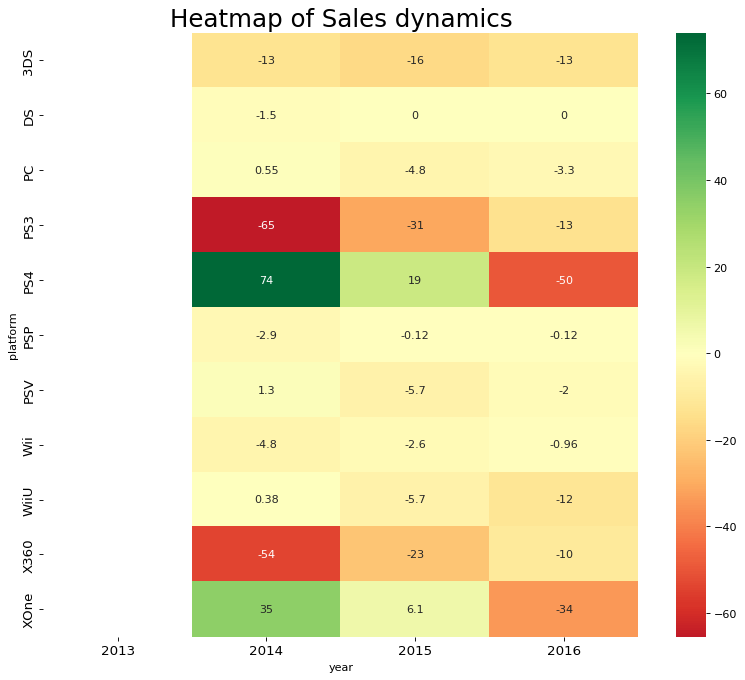

In [57]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(sales_dynamics, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Heatmap of Sales dynamics', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Most of the sales are more or less homogenious in their dynamics (see bright-yellow bricks), but some had an interetsting dynamics:
* `PS3` and `X360` : both had a major decrease in 2014 in comparison with 2013, but since then seems to slowly but confidently make its' way up in sales, so can be potentially profitable,
* `PS4`: closes the year 2014 in a much higher revenue than in 2013, but decreases strongly since then,
* `Xone`: shows increasement in 2014, decreases since then,
* `Wii`: looks like it's decreasment is getting smaller and smaller with every year, if they keep up with such dynamic - they can also be profitable.

**To see the distibution of sales of all games, broken down by platform we will build a box plot. With the help of it we will be able to say if there were any differences in sales and if they were significant.**

In [58]:
# Group the total sales by name of the game and the platform
box_plot_data = data_upd.groupby(['name', 'platform'], as_index=False)['total_sales'].sum()
box_plot_data

,name,platform,total_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
4,Haikyu!! Cross Team Match!,3DS,0.04
...,...,...,...
2229,Zumba Fitness: World Party,Wii,0.23
2230,Zumba Fitness: World Party,XOne,0.24
2231,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,0.05
2232,htoL#NiQ: The Firefly Diary,PSV,0.01


In [59]:
order = box_plot_data.groupby(['platform'])['total_sales'].sum().reset_index()\
                    .sort_values(by='total_sales')['platform']
order

1       DS
5      PSP
7      Wii
6      PSV
2       PC
8     WiiU
9     X360
0      3DS
10    XOne
3      PS3
4      PS4
Name: platform, dtype: object

Text(0.5, 1.0, 'Stripplot of games sales by platform')

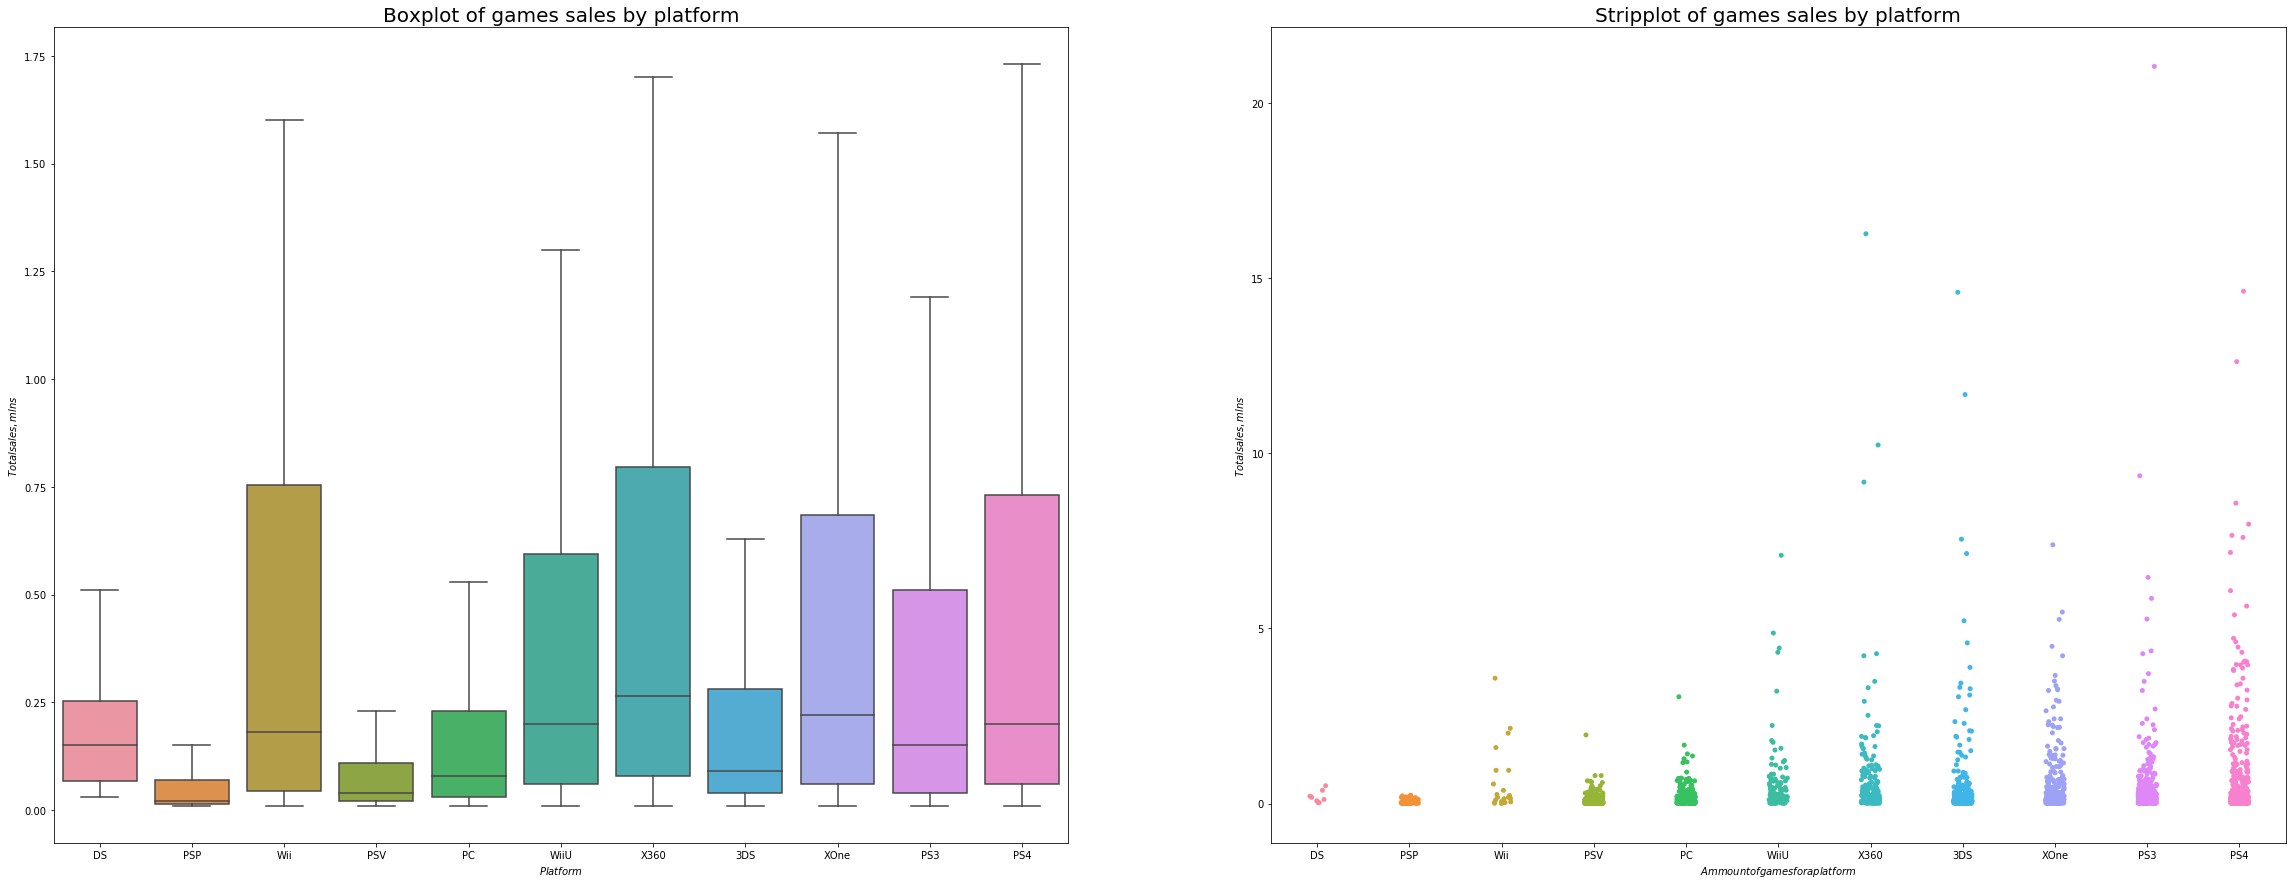

In [60]:
# Draw the figure and its' position
f = plt.figure(figsize=(40, 15))
gs = f.add_gridspec(1, 2)
# Plot a boxplot on the left
ax = f.add_subplot(gs[0, 0])
a = sns.boxplot(x='platform', y='total_sales', data=box_plot_data, order=order, showfliers = False)
plt.gca().set(ylabel='$Total sales, mlns$', xlabel='$Platform$')
plt.title('Boxplot of games sales by platform', fontdict={'size':20})
# Plot a stripplot on the left
ax = f.add_subplot(gs[0, 1])
b = sns.stripplot(x='platform', y='total_sales', data=box_plot_data, order=order)
plt.gca().set(ylabel='$Total sales, mlns$', xlabel='$Ammount of games for a platform$')
plt.title('Stripplot of games sales by platform', fontdict={'size':20})


This graph is great, but we should better build another graph right next to it, to see and evaluate how big each group is - how many sales and games actually were there for each platform. The main idea is to see how sales varied for different platforms and to compare their average sales. Because we sorted the boxes by total sales we know that platforms with the biggest sales are concentrated on the right side of our plots. Those are `WiiU`, `X360`, `3DS`, `XOne`, `PS3` and `PS4`. Among them `X360`, `XOne` and `PS4` seem to have the **biggest variability in sales**, we can see that the median sales and ammount of games in each of those platforms is more or less the same, but judging by the stripplot graph, `PS4` **has higher points in maximum sales, which benefits it.** In comparison to these three platforms looks like `PS3` has a smaller sales distribution  and a lower median of sales, bit the maximum point of sales that it had is the biggets one of all the platforms. Having that said, lets' analyse how reviews and scores affected sales on one of the promising platforms, the `PS4`.

**For this task a scattermatrix and a correlation table will be the best tools to see the dependencies between reviews and sales.**

In [61]:
# Filter data, leaving only rows for the chosen platform
ps4 = data_upd.query('platform == "PS4"')
ps4

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,2015,14.63
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014,12.62
77,FIFA 16,PS4,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,2015,8.58
87,Star Wars Battlefront (2015),PS4,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,2015,7.98
92,Call of Duty: Advanced Warfare,PS4,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,2014,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,2016,0.01
16503,Shin Hayarigami 2,PS4,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2016,0.01
16526,Dungeons 2,PS4,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,2016,0.01
16530,Carmageddon: Max Damage,PS4,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,2016,0.01


In [62]:
# Take the median of scores and sales for the pairplot
ps4_analys = ps4.pivot_table(index='total_sales', values=['critic_score', 'user_score'], aggfunc='median')\
.reset_index()
ps4_analys

,total_sales,critic_score,user_score
0,0.01,56.0,6.20
1,0.02,62.0,6.60
2,0.03,73.0,7.45
3,0.04,77.0,7.60
4,0.05,66.0,7.80
...,...,...,...
137,7.17,87.0,6.50
138,7.60,85.0,5.00
139,7.66,83.0,5.70
140,8.58,82.0,4.30


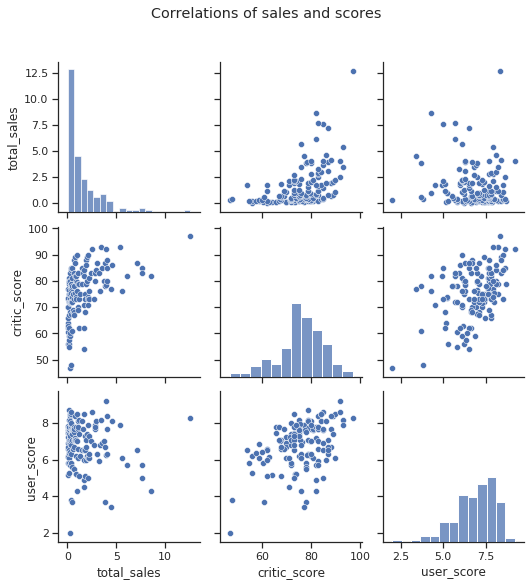

In [63]:
ax = sns.set_theme(style="ticks")
ax = sns.pairplot(ps4_analys)
ax.fig.suptitle('Correlations of sales and scores', y=1.08)
plt.show()

In the upper row of the scattermatrix we can see that where the total sales begin to decrease, the critic scores are rising, however there is no such clear picture for the user score.

In [64]:
ps4_analys.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.486952,-0.104014
critic_score,0.486952,1.000000,0.449693
user_score,-0.104014,0.449693,1.000000


So there is deffinitly a middle strong correlation between the critic score and sales and a slightly negative between user score and sales, but it is very important to say that there seem to be also a dependency between the users and the critics scores themselves, so the case can be more complicated than it seems, if the critics score and usres score are affecting each other, then their overall relationship can affect sales, and not only one of the scores.

Let's check some other platforms that seemed to have a good potential. We need to build a function that will take a name of the platform, filter the data, ignore the missing values and build a plot and a correlation table.


In [65]:
def score_effect(platform, score_type):
    # filter the data by platform name and score type, ommit missing values
    data = data_upd[(data_upd['platform'] == platform) & (data_upd[score_type].notna())][['total_sales', score_type]] 
    # draw a pairplot matrix
    ax = sns.set_theme(style="ticks")
    ax = sns.pairplot(data)
    ax.fig.suptitle('Correlations of sales and scores', y=1.08)
    plt.show()
    # print the correlation table
    print()
    print(data.corr())
    print('-'*45)



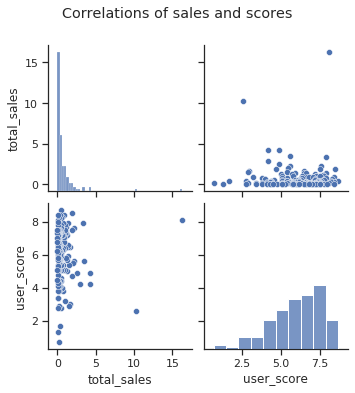


             total_sales  user_score
total_sales     1.000000   -0.011742
user_score     -0.011742    1.000000
---------------------------------------------


In [66]:
# Check that the function worked on one of the platforms of interest
score_effect('X360', 'user_score')

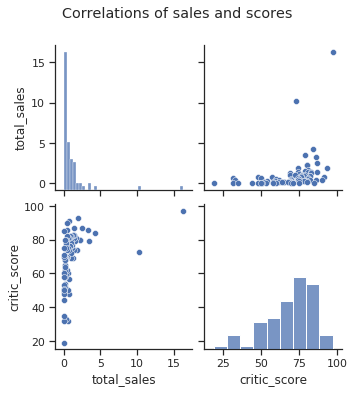


              total_sales  critic_score
total_sales      1.000000      0.350345
critic_score     0.350345      1.000000
---------------------------------------------


In [67]:
score_effect('X360', 'critic_score')

X360 conclusion - no strong correlation, a middle positive correlation between critic score abd sales

In [68]:
# Create a list of platforms of interest to iterate over
platforms_list = ['PS3', 'XOne', 'WiiU']

Correlations of PS3


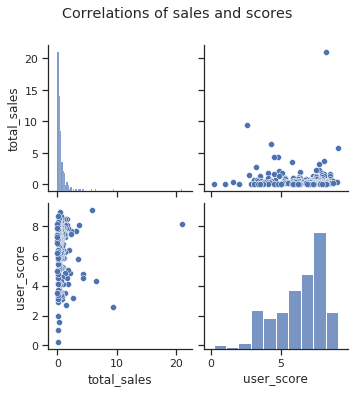


             total_sales  user_score
total_sales     1.000000    0.002394
user_score      0.002394    1.000000
---------------------------------------------



Correlations of XOne


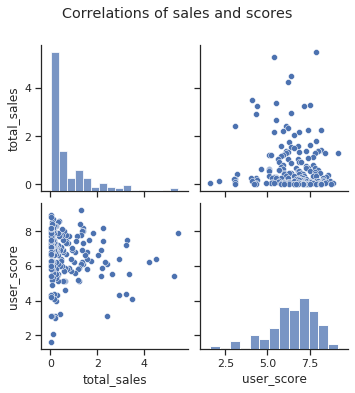


             total_sales  user_score
total_sales     1.000000   -0.068925
user_score     -0.068925    1.000000
---------------------------------------------



Correlations of WiiU


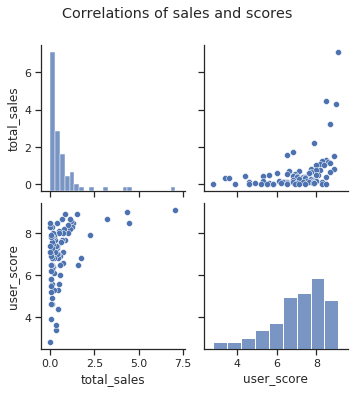


             total_sales  user_score
total_sales      1.00000     0.41933
user_score       0.41933     1.00000
---------------------------------------------





In [69]:
# Aplly the function on each element of the list
for pl in platforms_list:
    print('Correlations of', pl)
    score_effect(pl, 'user_score')
    print()
    print()
    print()

Of all listed platforms only for the `WiiU` the user score had a middle level positive affect on its' sales, rest of them - no strong or middle correlation.

Correlations of PS3


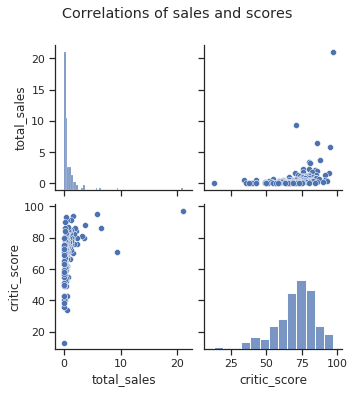


              total_sales  critic_score
total_sales      1.000000      0.334285
critic_score     0.334285      1.000000
---------------------------------------------



Correlations of XOne


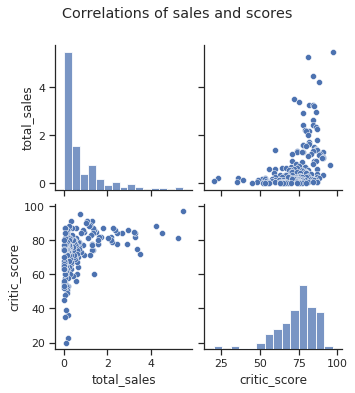


              total_sales  critic_score
total_sales      1.000000      0.416998
critic_score     0.416998      1.000000
---------------------------------------------



Correlations of WiiU


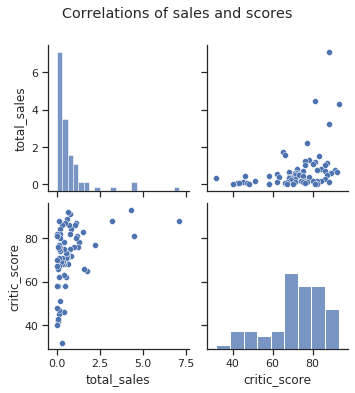


              total_sales  critic_score
total_sales      1.000000      0.376415
critic_score     0.376415      1.000000
---------------------------------------------





In [70]:
# Repeat procedure for the critic score
for pl in platforms_list:
    print('Correlations of', pl)
    score_effect(pl, 'critic_score')
    print()
    print()
    print()

In each one of the listed platforms critic score and sales has middle positive correlation.

**Lets take a look at the general distribution of games by genre. What can we say about the most profitable genres? Well, the best way to visualize the answer to that question will be a treemap.**

In [71]:
# Group our data by the genre
group_by_genre = data_upd.groupby(['genre'])[['name', 'total_sales']]\
                        .agg({'name': 'count', 'total_sales': 'sum'})\
                        .reset_index().sort_values(by='genre')
med = data_upd.groupby(['genre'], as_index=False)['total_sales'].median()
med = med['total_sales']
group_by_genre['median_sales'] = med
group_by_genre


,genre,name,total_sales,median_sales
0,Action,767,322.22,0.110
1,Adventure,245,23.64,0.030
2,Fighting,80,35.31,0.125
3,Misc,155,62.82,0.100
4,Platform,74,42.63,0.225
5,Puzzle,17,3.17,0.060
6,Racing,85,39.89,0.120
7,Role-Playing,292,145.89,0.125
8,Shooter,187,232.98,0.450
9,Simulation,62,21.76,0.100


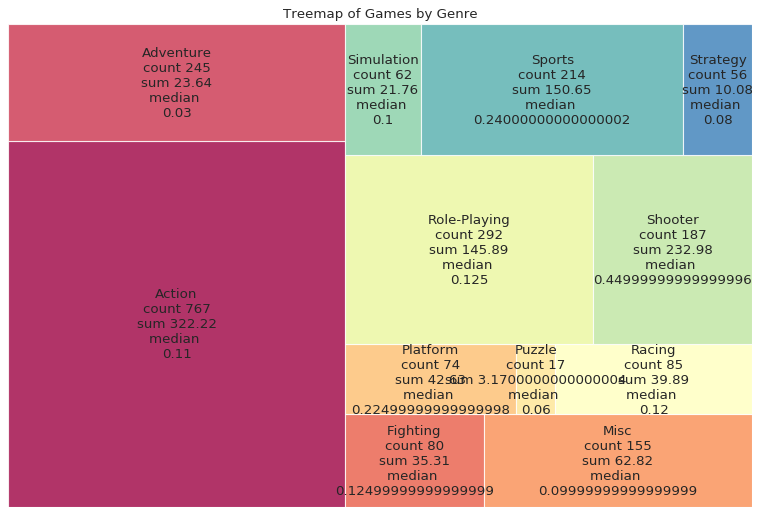

In [112]:
# Set titles from the table to be inside the trees
labels = group_by_genre.apply(lambda x: str(x[0]) + 
                              "\n" + 'count ' + str(x[1]) +
                              "\n" + 'sum ' + str(x[2]) + 
                              "\n" + 'median ' + 
                              "\n" + str(x[3]), 
                              axis=1)
sizes = group_by_genre['name'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Games by Genre')
plt.axis('off')
plt.show()

Conclusion on genres: 

The top biggest ammount of games are released in *Action* and *Adventure* genre, their amount together coveres about a 1/3 part of all games. 

Next are *Role Playing*, *Shooters* and *Sports*, but note that *Sports* genre was much higher in total revenue than for example *Adventure* had and the median is also higher. 

As for *Shooters* - the ammount of games existing in this genre is quit low in comparison with the top, but they have the highest median, and this can indicate this genre to be highly profitable.

There is also a small section for *Misc*, *Racing*, *Simulation*, *Platfrom*, *Puzzle*, *Strategy* and *Fighting* genres, which alltogether make about 1/5 part of all other games.

# Summing up the visualization


In this part of our analysis we determined that the significant period of sales started from the year *2001.* We found that the most profitable platforms for this period were `PSP`, `PS4`, `GBA`, `PS`, `DS`, `Wii`, `PS3`, `X360`, `PS2` - their sales were above average. We saw a typical picture of a lifetime of a platform - on average a platform lived 6 years and had 1 or 2 peaks in sales. In order to be able to build a prognosis for the 2017 we determined again a significant period of time to be the year *2013*, rest of the data was disregarded. We found platforms that were growing or shrinking:
* `PS3` and `X360` : both had a major decrease in 2014 in comparison with 2013, but since then seems to slowly but confidently make its' way up in sales, so can be potentially profitable,
* `PS4`: closes the year 2014 in a much higher revenue than in 2013, but decreases strongly since then,
* `Xon`e: shows increasement in 2014, decreases since then,
* `Wii`: looks like it's decreasement is getting smaller and smaller with every year, if they keep up with such dynamic - they can also be profitable. 
`WiiU`, `X360`, `3DS`, `XOne`, `PS3` and `PS4` had the biggest distributions in sales
For `PS4`, `PS3`, `X360`, `XOne`, `WiiU` we found a positive correlation between sales and critic score, and some very weak negative correlation in sales and user score, but we must keep in mind that user score and critic score have a correlation relationship of their own, and they can also affect each other
• What can we say about the most profitable genres?
In terms of the amount of games released under *Action* and *Adventure* genres those two together take a share of 1/3 part of all other genres sales. *Role Playing*, *Shooters* and *Sports* - have 2 best place for amount of games, but among them *Shooters* and *Sports* have the 2 biggest median in sales, which points out to a good profit potential.

# 4 Create a user profile for each region

It's time to find out what the user profile is like. The only place where we can get some information about who our users are is the region they come from and `ESRB` - it can give us a clue on age category of the user. Now lets proceed, and: 

Determine for each region (`NA`, `EU`, `JP`):

* The top five platforms. We can describe variations in their market shares from region to region.

* The top five genres.

* See if `ESRB` ratings affected sales in every region.

In [73]:
# Create a subset just for the top 5 platforms in NA region
top5_na=data_upd.groupby(['platform'], as_index=False)[['total_sales', 'na_sales']].sum().sort_values(by='na_sales', ascending=False)
top5_na.head()

,platform,total_sales,na_sales
4,PS4,314.14,108.74
10,XOne,159.32,93.12
9,X360,136.80,81.66
3,PS3,181.43,63.50
0,3DS,143.25,38.20


In [74]:
# Europe region
top5_eu=data_upd.groupby(['platform'])[['total_sales', 'eu_sales']]\
                .sum().reset_index().sort_values(by='eu_sales', ascending=False)
top5_eu.head()

,platform,total_sales,eu_sales
4,PS4,314.14,141.09
3,PS3,181.43,67.81
10,XOne,159.32,51.59
9,X360,136.80,42.52
0,3DS,143.25,30.96


In [75]:
# Japan region
top5_jp=data_upd.groupby(['platform'])[['total_sales', 'jp_sales']]\
                .sum().reset_index().sort_values(by='jp_sales', ascending=False)
top5_jp.head()

,platform,total_sales,jp_sales
0,3DS,143.25,67.81
3,PS3,181.43,23.35
6,PSV,32.99,18.59
4,PS4,314.14,15.96
8,WiiU,64.63,10.88


`PS4` leads in sales both in *North America* and *Europe*, but not so popular in *Japan* though. In general, the `PS4`, `PS3`, `XOne`, `X360` and `3DS` are the top 5 both in *NA* and *EU* region with a different order, but again, *JP's* top 5 looks different, except from the `3DS`, `PS3` and `PS4` japanese users loved the `PSV` and `WiiU` platforms. Lets take a look at this table alltogether.

In [76]:
data_frames = [top5_na, top5_eu, top5_jp] # list of frames to be merged 
df_merged = reduce(
    lambda  left, right: pd.merge(
        right, left, on = ['total_sales', 'platform'], how = 'outer'), data_frames).fillna(0)
df_merged.sort_values(by='total_sales', ascending=False)

,platform,total_sales,jp_sales,eu_sales,na_sales
3,PS4,314.14,15.96,141.09,108.74
1,PS3,181.43,23.35,67.81,63.50
7,XOne,159.32,0.34,51.59,93.12
0,3DS,143.25,67.81,30.96,38.20
6,X360,136.80,0.51,42.52,81.66
4,WiiU,64.63,10.88,19.85,29.21
10,PC,39.78,0.00,25.61,11.17
2,PSV,32.99,18.59,6.10,5.04
8,Wii,13.66,0.05,5.93,6.56
5,PSP,3.50,3.29,0.17,0.00


So `PS4` is a defifnite leader in overall sales, with biggest share in *NA* region, next we have `PS3` with the same pattern, `XOne` - very popular in *NA* and *EU* regions, barely sold in *JP* region. From what we can say, *Japan's* most popular platfrom is the `3DS` and its' sales are quite up in the overall sales - its' on the fourth place in general sales. But what about the average sales?

In [77]:
df_merged.pivot_table(
    index='platform', 
    values=['total_sales', 'jp_sales', 'eu_sales', 'na_sales'], 
    aggfunc=['sum', 'mean'])

sum                                   mean                    \
         eu_sales jp_sales na_sales total_sales eu_sales jp_sales na_sales   
platform                                                                     
3DS         30.96    67.81    38.20      143.25    30.96    67.81    38.20   
DS           0.85     0.00     0.57        1.54     0.85     0.00     0.57   
PC          25.61     0.00    11.17       39.78    25.61     0.00    11.17   
PS3         67.81    23.35    63.50      181.43    67.81    23.35    63.50   
PS4        141.09    15.96   108.74      314.14   141.09    15.96   108.74   
PSP          0.17     3.29     0.00        3.50     0.17     3.29     0.00   
PSV          6.10    18.59     5.04       32.99     6.10    18.59     5.04   
Wii          5.93     0.05     6.56       13.66     5.93     0.05     6.56   
WiiU        19.85    10.88    29.21       64.63    19.85    10.88    29.21   
X360        42.52     0.51    81.66      136.80    42.52     0.51    81.66   
XOne        51.59     0.34    93.12      159.32    51.59     0.34    93.12   

                      
         total_sales  
platform              
3DS           143.25  
DS              1.54  
PC             39.78  
PS3           181.43  
PS4           314.14  
PSP             3.50  
PSV            32.99  
Wii            13.66  
WiiU           64.63  
X360          136.80  
XOne          159.32

If we are analysing the mean sales, totals and by region, again we can see that the `PS4` has the biggest sales, than with a big gap comes`PS3`, `XOne`, `X360` and `3DS`.

**Moving on to see what were the top 5 genres in each region**

In [78]:
top5_genres_na = data_upd.groupby(['genre'], as_index=False)['na_sales']\
                        .agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
top5_genres_na.head()

,sum,mean
genre,,
Action,126.11,0.164420
Shooter,109.74,0.586845
Sports,65.27,0.305000
Role-Playing,46.40,0.158904
Misc,27.49,0.177355


In [79]:
top5_genres_eu = data_upd.groupby(['genre'], as_index=False)['eu_sales']\
                        .agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
top5_genres_eu.head()

,sum,mean
genre,,
Action,118.38,0.154342
Shooter,87.86,0.469840
Sports,60.52,0.282804
Role-Playing,36.97,0.126610
Racing,20.19,0.237529


In [80]:
top5_genres_jp = data_upd.groupby(['genre'], as_index=False)['jp_sales']\
                        .agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
top5_genres_jp.head()

,sum,mean
genre,,
Role-Playing,51.04,0.174795
Action,40.49,0.052790
Misc,9.20,0.059355
Fighting,7.65,0.095625
Shooter,6.61,0.035348


*Action*, *Shooter*, *Sports*, *Role playing* are the same for both - *NA* region and *Europe*, Europe users seems to buy *Racing* a bit more than *NA* users, *JP* users again have a slightly different top 5 - *Role-Playing* is the most succesfull genre here, *Action* takes 2nd place, then *Misc*, *Fighting* and the least one to make it to the top 5 is the *Shooter* genre. 

**Lets' have a look at the rating, but firts a little annotation on abbreviations:**

`C` - children 3 years and higher,

`E` - children 6+

`E10+` - children from age 10 and above

`T` - 13 years and older

`M` - mature, 17+

`A` or `AO` - adults only, 18+

`RP` - rating pending, this means that the product has been submitted to the ESRB and is awaiting a rating, which is an interesting information by itself, that can indicate that a platform is preparing a release some time soon or already has a demo-version.

In [81]:
na_ratings = data_upd.groupby(['rating'])[['total_sales', 'na_sales']]\
                    .sum().reset_index().sort_values(by='na_sales', ascending=False)
na_ratings

,rating,total_sales,na_sales
2,M,372.03,165.27
4,unknown,276.84,89.42
0,E,200.16,79.05
1,E10+,115.39,54.24
3,T,126.62,49.79


In [82]:
eu_ratings = data_upd.groupby(['rating'])[['total_sales', 'eu_sales']]\
                    .sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_ratings

,rating,total_sales,eu_sales
2,M,372.03,145.57
0,E,200.16,83.36
4,unknown,276.84,78.91
1,E10+,115.39,42.69
3,T,126.62,41.95


In [83]:
jp_ratings = data_upd.groupby(['rating'])[['total_sales', 'jp_sales']]\
                    .sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_ratings

,rating,total_sales,jp_sales
4,unknown,276.84,85.05
3,T,126.62,20.59
0,E,200.16,15.14
2,M,372.03,14.11
1,E10+,115.39,5.89


In [84]:
rating_frames = [na_ratings, eu_ratings, jp_ratings] # list of frames to be merged 
ratings_merged = reduce(
    lambda  left, right: pd.merge(
        right, left, on=['rating', 'total_sales'], how='outer'), rating_frames).fillna(0)
ratings_merged

,rating,total_sales,jp_sales,eu_sales,na_sales
0,unknown,276.84,85.05,78.91,89.42
1,T,126.62,20.59,41.95,49.79
2,E,200.16,15.14,83.36,79.05
3,M,372.03,14.11,145.57,165.27
4,E10+,115.39,5.89,42.69,54.24


In each region we have the same age categories, placed in different order, from 6+ to 17+, but those little tables are not informative enough - we certeinly need some boxplots, to see the affect a rating had on the distribution and average of sales.

In [85]:
order1 = data_upd.groupby(['rating'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['rating']
order1

1       E10+
3          T
0          E
4    unknown
2          M
Name: rating, dtype: object

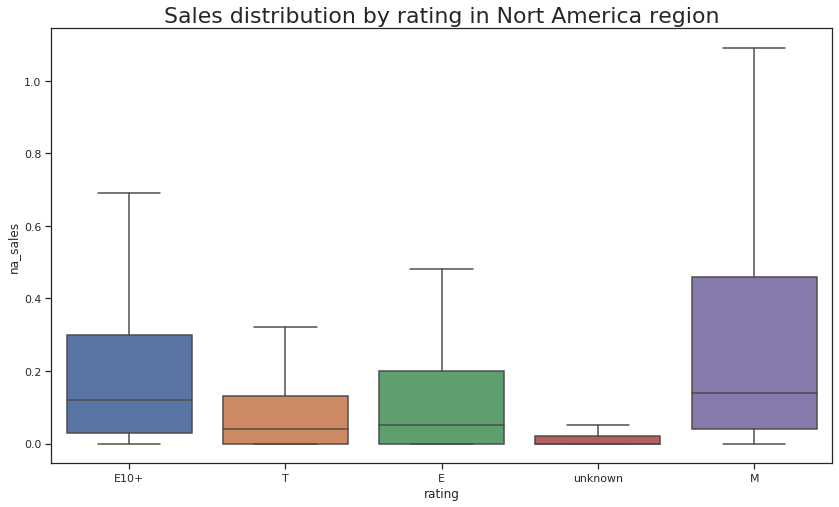

In [86]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(x = 'rating', y = 'na_sales', order = order1, data = data_upd, showfliers = False)
plt.title('Sales distribution by rating in Nort America region',  fontsize = 22)
plt.show()

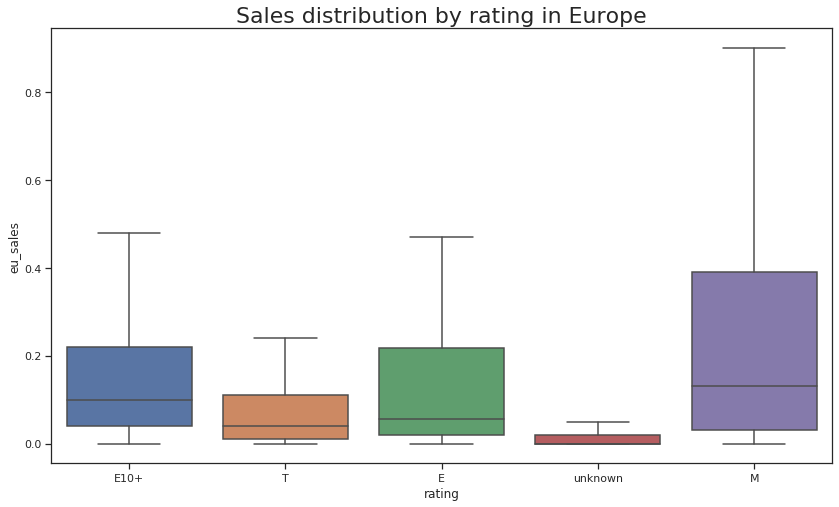

In [87]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(x = 'rating', y = 'eu_sales', order = order1, data = data_upd, showfliers = False)
plt.title('Sales distribution by rating in Europe',  fontsize = 22)
plt.show()

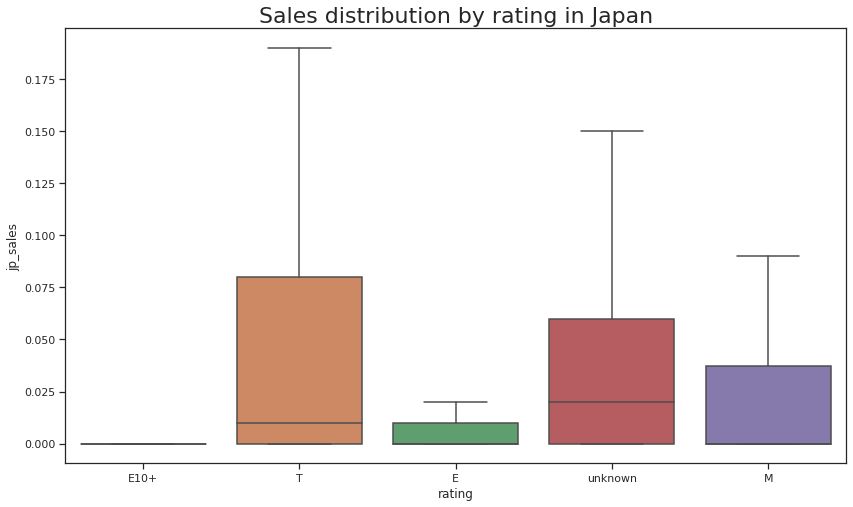

In [88]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(x = 'rating', y = 'jp_sales', order = order1, data = data_upd, showfliers = False)
plt.title('Sales distribution by rating in Japan',  fontsize = 22)
plt.show()

Both of the graphs for *NA* and *EU* are almost identical: rating *M* has biggest variation and the highest median, *E* and *E10+* share the second place and *T* has a very low distribution of sales by region and the lowest median. In *Japan* the picture is different again - *T* rating has **the most varied sales** but the "unknown" rating has **the highest median**, and for rest of the ratings the measures are much lower, especially the medians. Unfortunatlely we don't know for sure what were the unknown ratings, and we can only assume, that there are so many in Japan, because Japan actualy has it's own software and gaming ratimg system.

# Overall conclusion on a user profile

A user in North America and a user in Europe are very similar in almost every way - their favorite platforms are  PS4, PS3, XOne, X360 and 3DS, favorit genres of games - Action, Shooter, Sports, Role playing. Games for people of age 18+ are the category with the highest average sales and biggest variance, then comes the 6+ and the 10+ age category with a little bit lower and smaller distribution of sales, and 13+ was the category with lowest average sales and narrowest distribution. Japan users bought more games from 3DS, PS3 PS4, PSV and WiiU platforms, their favorite genres were Role Playing, Action, Misc, Fighting and Shooters. The age category that bought most of the games in this region turned out to be 13+, and rest of the categories were very low in sales, probably could be because Japan actually has its own system of software rating. In conclusion we can say that if we were to choose a strategy, that was based on a user profile by regions then North America and Europe users can be treated the same, but not Japan region, as it has its' particular qualities, different from the other two regions.

# 5 Test the following hypotheses

One of the tasks of this analysis is to **test 2 hypotheses:** 
1. Average user ratings of the Xbox One and PC platforms are the same.

2. Average user ratings for the Action and Sports genres are different.

To prove or refute those statements we need to perform statistical tests. We have 2 independent groups and we are comparing averages, so we will need the `ttest.ind()` for independent groups. Lets' prepare our data for the test.

In [89]:
# Filter out user score values for each platform without the Nans
xbox1 = data[(data.platform == 'XOne')  & (data.user_score.notna())]['user_score'].astype(float)
pc = data[(data.platform == 'PC')  & (data.user_score.notna())]['user_score'].astype(float)

Now that our data is filtered and ready lets formulate our null hypothesis: that would be a status quo statement that there really is no difference in the average user scores of the Xbox One and PC platforms and they are the same:

$ H_{0}:$ $\bar{x}_{Xbox One} = \bar{x}_{PC} $

Then the alternative hypothesis states that user scores of Xbox One and PC platforms are different:

$ H_{1}:$ $\bar{x}_{Xbox One} \neq \bar{x}_{PC} $

Because we are comparing the means of two independent groups we choose to perform a *t-test*. Knowing that the *t-test* requires the variances in both samples to be homogeneous before performing it we will run the *Leven's test.* *Levene's test* has its' own null hypothesis, stating that the groups we're comparing all have equal variances.
If this is true, we'll probably find slightly different variances in our samples. However, very different sample variances suggests that the samples' variances weren't equal after all. In this case we'll reject the null hypothesis of equal population variances. If the resulting p-value of Leven's test will be less than our level of significance (0.05), it would indicate that the resulting differences in sample variances are unlikely to occur and the null hypothesys will be rejected

In [90]:
# Stating level of significance
alpha = 0.05

Levene's test can be used to answer the following question:
Is the assumption of equal variances valid?

In [91]:
levene = st.levene(xbox1, pc, center='mean') 
levene

LeveneResult(statistic=3.084164397192855, pvalue=0.07938488147434661)

As a rule of thumb, we conclude that
samples variances are not equal if the result (pvalue) is < 0.05

In [92]:
levene.pvalue < alpha

False

Right, we see the result is just littble bigger than 0.05, for us this means that we can't say that the variances are different - they are homogeneuos, and this is good news, we can perform the t-test.

In [93]:
results = st.ttest_ind(xbox1, pc)
results

Ttest_indResult(statistic=-4.398946074765017, pvalue=1.212685740777407e-05)

This is the result of our t-test, lets compare it to the significance level and see if we can or can not reject the null hypotheses.

In [94]:
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


In [95]:
print('Xbox One average user score is', xbox1.mean())
print('PC average user score is', pc.mean())

Xbox One average user score is 6.521428571428572
PC average user score is 7.067857142857142


If the sample was done properly and is representing the general population, then **we can state with 95% confidence that there is some difference between average user score from Xbox One and PC platforms.** Have a look at the average revenues - PC average user score is slightly higher. 
Otherwise, we don't know the answer.

Moving on to our next hypothesis: *average user ratings for the Action and Sports genres are different.* The null hypothesis would state that there is realy no difference between the average user ratings for the Action and Sports genres

*Null*

$ H_{0}:$ $\bar{x}_{Action} = \bar{x}_{Sports} $

*Alternative*

$ H_{1}:$ $\bar{x}_{Action} \neq \bar{x}_{Sports} $


In [96]:
# Subseting the data without missing values
action = data[(data['genre'] == 'Action') & (data.user_score.notna())]['user_score'].astype(float)
sports = data[(data['genre'] == 'Sports') & (data.user_score.notna())]['user_score'].astype(float)

We need to repeate all of the previous procedure, so Levens' test:

In [97]:
st.levene(action, sports, center='mean') 

LeveneResult(statistic=22.313822594675393, pvalue=2.42614262200515e-06)

As we see, the p-value of significance is quite small and it means that our variances are different enough that we must reflect it in the `st.ttest_ind()` by passing the `equal_var=False` argument.

In [98]:
results1 = st.ttest_ind(action, sports, equal_var=False)
results1

Ttest_indResult(statistic=1.6725870130859273, pvalue=0.09455979262895202)

In [99]:
if results1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We can't reject the null hypothesis


In [100]:
print('Action genre games average user score is', action.mean())
print('Sports genre games average user score is', sports.mean())

Action genre games average user score is 7.058931552587646
Sports genre games average user score is 6.959466911764705


Well, recalling our null hypothesis looks like we don't have enough grounds to reject it. So again, with a condition that our sample is representative, we can say **with 95% confidence that the average user score of Action and Sports genres are the same.**

# 6 General conclusion

The goal of our project was to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns
In the dataset we worked with there were 16715 observations in 11 columns. We had a lot of  missing values in the Name, Genre, Year of Release, Critic Score, User Score and Rating columns. We filled what we could and omitted what was safe, but yet the columns Critic Score, User Score and Rating remained as they were, because they lacked almost 50% of the data.


**1 Preprocessing stage** 

In this part we filled in what we could in the missing values of year of release, fixed the data types in user score and year of release columns, replaced 'tbd' in user score bu Nans, and in the rating column the missing values were replaced with 'unknown', we also checked for inappropriate zeros and duplicates. From this step a decision was made to ignore missing values wherever it will be necessary.

**2 Calculation stage**

To proceed with the analysis a crucial information we didn't originally had was total sales - we calculated it in a separate column. 

**3 Visualization and analysis stage**

In this part of our analysis we determined that the significant period of sales started from the year *2001.* We found that the most profitable platforms for this period were `PSP`, `PS4`, `GBA`, `PS`, `DS`, `Wii`, `PS3`, `X360`, `PS2` - their sales were above average. We saw a typical picture of a lifetime of a platform - on average a platform lived 6 years and had 1 or 2 peaks in sales. In order to be able to build a prognosis for the 2017 we determined again a significant period of time to be the year *2013*, rest of the data was disregarded. We found platforms that were growing or shrinking:
* `PS3` and `X360` : both had a major decrease in 2014 in comparison with 2013, but since then seems to slowly but confidently make its' way up in sales, **so can be potentially profitable**,
* `PS4`: closes the year 2014 in a much higher revenue than in 2013, but decreases strongly since then,
* `Xone`: shows increasement in 2014, decreases since then,
* `Wii`: looks like it's decreasement is getting smaller and smaller with every year, if they keep up with such dynamic - they **can also be profitable.** 

`WiiU`, `X360`, `3DS`, `XOne`, `PS3` and `PS4` had the **biggest distributions in sales**
For `PS4`, `PS3`, `X360`, `XOne`, `WiiU` we found a positive correlation between sales and critic score, and some very weak negative correlation in sales and user score, but we must keep in mind that user score and critic score have a correlation relationship of their own, and they can also affect each other
• What can we say about the most profitable genres?
In terms of the amount of games released under Action and Adventure genres those two together take a share of 1/3 part of all other genres sales, but in terms of the total revenue - there is Action, Role Playing and Shooters, although they don't have such a big amount of games. Judging by the median two very profitable genres could be Shotter with the highest median and Sports on the second place.


**4 User profile**

A user in *North America* and a user in *Europe* are very similar in almost every way - their favorite platforms are  `PS4`, `PS3`, `XOne`, `X360` and `3DS`, favorite genres of games - Action, Shooter, Sports, Role playing. Games for people of age 18+ are the category with the highest average sales and biggest variance, then comes the 6+ and 10+ age category with a little bit lower and smaller distribution of sales, and 13+ was the category with lowest average sales and narrowest distribution. 

*Japan users* bought more games from `3DS`, `PS3`, `PS4`, `PSV` and `WiiU` platforms, their favorite genres were Role Playing, Action, Misc, Fighting and Shooters. The age category that bought most of the games in this region remained unknown, probably could be because Japan actually has its own system of software rating, and rest of the categories were very low in sales. 

In conclusion we can say that if we were to choose a strategy, that was based on a user profile by regions then *North America* and *Europe* users can be treated the same, but not *Japan region*, as it has its' particular qualities, different from the other two regions.

**5 Hypothesis**
We tested two hypothesis in this project:

-**Average user ratings of the Xbox One and PC platforms are the same**,
statistical tests showed that with 95% confidence there was some difference between average user score from Xbox One and PC platforms.

-**Average user ratings for the Action and Sports genres are different**,
we came to a result that with 95% confidence the average user score of Action and Sports genres are the same.




